**Import Libraries**

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

In [ ]:
star_df = pd.read_csv('/content/star_classification.csv')
star_df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606.0,301.0,2.0,79.0,6.543777e+18,GALAXY,0.634794,5812.0,56354.0,171.0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518.0,301.0,5.0,119.0,1.176014e+19,GALAXY,0.779136,10445.0,58158.0,427.0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606.0,301.0,2.0,120.0,5.152200e+18,GALAXY,0.644195,4576.0,55592.0,299.0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192.0,301.0,3.0,214.0,1.030107e+19,GALAXY,0.932346,9149.0,58039.0,775.0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102.0,301.0,3.0,137.0,6.891865e+18,GALAXY,0.116123,6121.0,56187.0,842.0


In [ ]:
star_df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [ ]:
star_df.dropna(inplace=True)

**Drop Unwanted Columns**

In [ ]:
star_df = star_df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z','class','redshift']]
star_df.head()

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123


**EDA**

In [ ]:
galaxy = star_df[star_df['class']=='GALAXY']
star = star_df[star_df['class']=='STAR']
qso = star_df[star_df['class']=='QSO']

NameError: ignored

In [ ]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='alpha',y='redshift',data=galaxy,color='r');
plt.title("Alpha Vs Redshift for Galaxy",{'fontsize':20});

NameError: ignored

<Figure size 648x504 with 0 Axes>

In [ ]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='alpha',y='redshift',data=star_df,color='r');
plt.title("Alpha Vs Redshift for Star",{'fontsize':20});

NameError: ignored

<Figure size 648x504 with 0 Axes>

In [ ]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='alpha',y='redshift',data=qso,color='r');
plt.title("Alpha Vs Redshift for QSO",{'fontsize':20});

NameError: ignored

<Figure size 648x504 with 0 Axes>

In [ ]:
star_df.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift'], dtype='object')

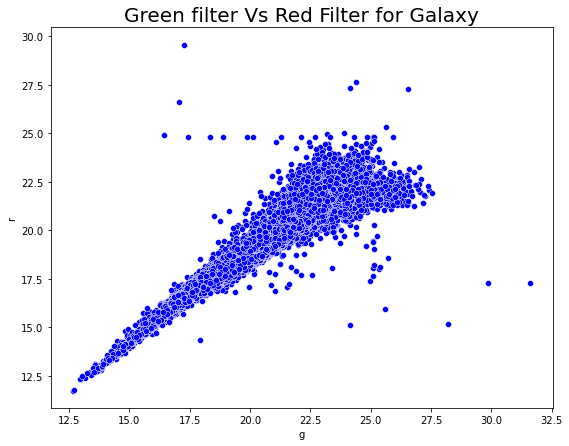

In [ ]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='g',y='r',data=galaxy,color='b');
plt.title("Green filter Vs Red Filter for Galaxy",{'fontsize':20});

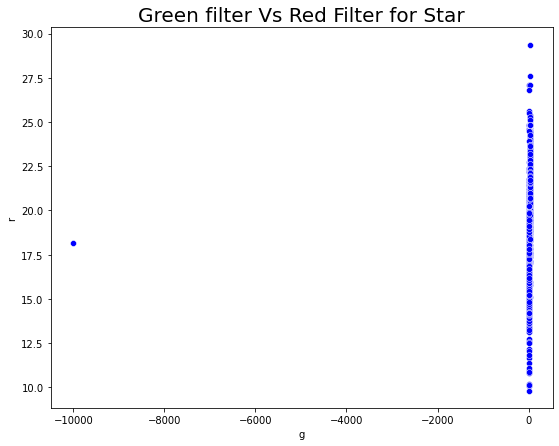

In [ ]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='g',y='r',data=star,color='b');
plt.title("Green filter Vs Red Filter for Star",{'fontsize':20});

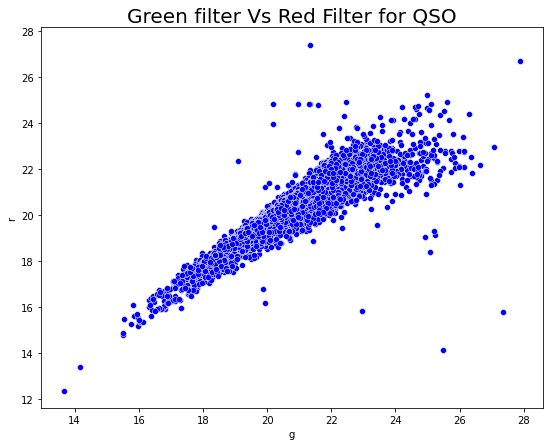

In [ ]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='g',y='r',data=qso,color='b');
plt.title("Green filter Vs Red Filter for QSO",{'fontsize':20});

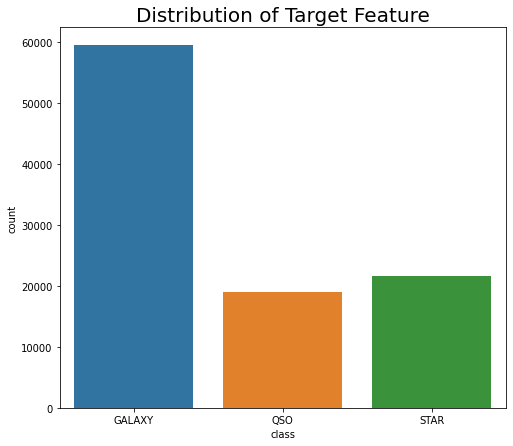

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(star_df['class']);
plt.title("Distribution of Target Feature",{'fontsize':20});

**Data Spliting**

In [ ]:
X = star_df.drop('class',axis=1)
y = star_df['class']

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y[20:]

array([0, 2, 0, ..., 1, 1, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

**Data Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test  = scalar.transform(X_test)

**Model Building**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = {
    KNeighborsClassifier(n_neighbors=3):'K-Neighbors Classifier',
    SVC():"Support Vector Machine",
    RandomForestClassifier():'Random Forest Classifier',
    GaussianNB():'Naive Bayers',
    LinearRegression():'Linear Regression',
    LogisticRegression():'LogisticRegression',
    DecisionTreeClassifier():'Decision Tree',
    GradientBoostingClassifier():'GradientBoostingClassifier'

}
for m in models.keys():
    m.fit(X_train,y_train)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",(model.score(X_test,y_test))*100,"%")

Accuracy Score for K-Neighbors Classifier is :  93.85442394304809 %
Accuracy Score for Support Vector Machine is :  96.38239139909923 %
Accuracy Score for Random Forest Classifier is :  97.90062472758972 %
Accuracy Score for Naive Bayers is :  91.97297689960773 %
Accuracy Score for Linear Regression is :  23.97551042427444 %
Accuracy Score for LogisticRegression is :  95.75039953508644 %
Accuracy Score for Decision Tree is :  96.2007845416243 %
Accuracy Score for GradientBoostingClassifier is :  97.69722504721778 %


**Model Evaluation**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV as RSCV

param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

model = RSCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(X_train, y_train)
model = model.best_estimator_
print(model)

In [ ]:
from sklearn.metrics import classification_report
for model,name in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for : {name}")
    print(classification_report(y_test,y_pred))

Classification Report for : K-Neighbors Classifier
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     12044
           1       0.95      0.83      0.89      3714
           2       0.90      0.81      0.85      4242

    accuracy                           0.90     20000
   macro avg       0.91      0.87      0.89     20000
weighted avg       0.91      0.90      0.90     20000

Classification Report for : Support Vector Machine
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     12044
           1       0.97      0.89      0.93      3714
           2       0.94      0.98      0.96      4242

    accuracy                           0.96     20000
   macro avg       0.96      0.95      0.95     20000
weighted avg       0.96      0.96      0.96     20000

Classification Report for : Random Forest Classifier
              precision    recall  f1-score   support

           0       0.98     

ValueError: ignored

**Model is deployed on Cluzters.ai (https://www.cluzters.ai/Model/2632/star-classification)**